<h3>20156042 Kim GaYoung</h3>

<K-means clustering>

K-means clustering

-Visualize K centroid images for each category.-

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1


In [4]:
file_data2		= "mnist_test.csv"
handle_file2	= open(file_data2, "r")
data2        		= handle_file2.readlines()
handle_file2.close()

num_image2	= len(data2)
count2       	= 0     # count for the number of images

list_image2  = np.empty((size_row * size_col, num_image2), dtype=float)
list_label2  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label2[count2]       = label
    list_image2[:, count2]    = im_vector    

    count += 1


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [9]:
group_num = np.zeros(num_image,dtype = 'int') 
#find max
def max(temp):
    max = temp[0]
    max_num = 0
    for i in range(10):
        if temp[i] > max:
            max = temp[i] 
            max_num = i
    return max_num

#find min distance
def min_dst(temp,k,x):

    min = temp[0]
    for i in range(k):
        if temp[i] < min:
            min = temp[i]
            group_num[x] = i  #centroid of x-th data is i
    return min

def plot_energy(energy):
    plt.plot(energy,'bo-')
    plt.xlabel('iteration')
    plt.ylabel('energy')
    plt.show()

def plot_accuracy(accuracy):
    plt.plot(accuracy,'go-')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.show()

def k_means(k):
    temp = np.full(k,1000,dtype = 'float') # save distance for min distance
    centroid = np.zeros(((size_row*size_col),k),dtype='float')  #centroids
    dst = np.zeros(num_image,dtype = 'float')
    energy = []
    accuracy = []
    cur_energy = 0
    pre_energy = 0
    
    #From the front, arbitrary centroids
    for i in range(k):
        for j in range(28*28):
            centroid[j][i]=list_image[j][i]
            
            
    for iteration in range(200):
        group_count=np.zeros(k,dtype='int')    # count number of each grounp 
        group_avg=np.zeros((size_row*size_col,k),dtype='float')  #average of each group data 
        
        for i in range(num_image): 
            for j in range(k):
                temp[j] = distance(list_image[:,i],centroid[:,j])
            dst[i] = min_dst(temp,k,i)
        
        cur_energy = np.sum(dst)
        energy.append(cur_energy)
        
        if cur_energy == pre_energy:
            break
            
        pre_energy = cur_energy
        
        for i in range(num_image):  
            group_count[group_num[i]] += 1  #count
            group_avg[:,group_num[i]] += list_image[:,i]  #sum

        for i in range(k):
            if group_count[i]!=0:
                group_avg[:,i] = group_avg[:,i] / group_count[i]  #average
            centroid[:,i]=group_avg[:,i]     #reset controids
            
            
        #각그룹에 각 label이 몇개있는지 저장
        group_major = np.zeros((k,10),dtype = 'int') 
        #각그룹에 가장 많은 label이 무엇인지 저장
        major = np.zeros(k,dtype = 'int')
        for i in range(num_image):
            group_major[group_num[i]][list_label[i]] +=1
        for j in range(k):
            major[j] = max(group_major[j])

        acc = 0
        #accuracy
        for i in range(k):
            acc += group_major[i][major[i]]

        accuracy.append(acc/num_image)
        
        
    
    plot_energy(energy)
    plot_accuracy(accuracy)
    return centroid

In [22]:
def k_means2(k,centroid):
    temp = np.full(k,1000,dtype = 'float') # save distance for min distance
    dst = np.zeros(num_image,dtype = 'float')
    energy = []
    accuracy = []
    cur_energy = 0
    pre_energy = 0
    
    for i in range(num_image): 
        for j in range(k):
            temp[j] = distance(list_image[:,i],centroid[:,j])
        min_dst(temp,k,i)

    #save number of each label in each group.
    group_major = np.zeros((k,10),dtype = 'int') 
    #save the most labels in each group
    major = np.zeros(k,dtype = 'int')
    for i in range(num_image):
        group_major[group_num[i]][list_label[i]] +=1
    for j in range(k):
        major[j] = max(group_major[j])

    acc = 0
    #accuracy
    for i in range(k):
        acc += group_major[i][major[i]]

    accuracy.append(acc/num_image)
    
    plot_accuracy(accuracy)

Plot the training energy per optimization iteration and the training accuracy per optimization iteration.

k=5, energy, accuracy (train)

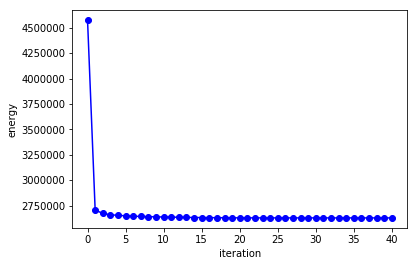

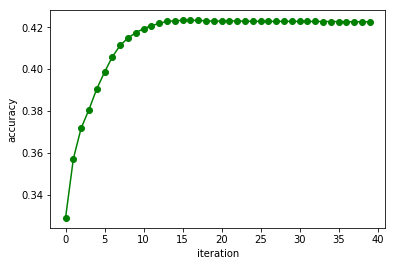

In [10]:
centr5 = np.zeros(((size_row*size_col),5),dtype='float')  #centroids
centr5 = k_means(5)

Plot the testing accuracy per optimization iteration.

k=5, accuracy(test)

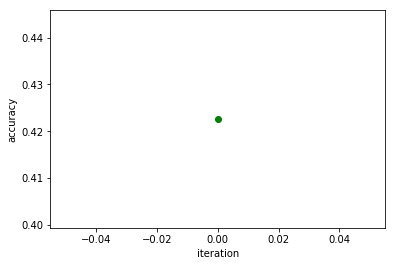

In [21]:
k_means2(5,centr5)


k=10, energy, accuracy(train)

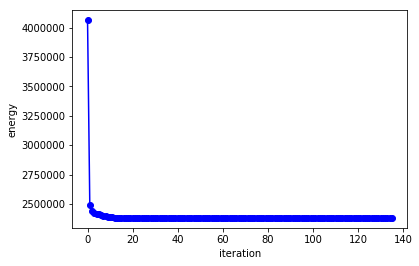

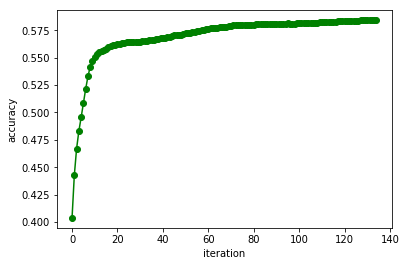

In [23]:
centr10 = np.zeros(((size_row*size_col),10),dtype='float')  #centroids
centr10 = k_means(10)

k=10, accuracy(test)

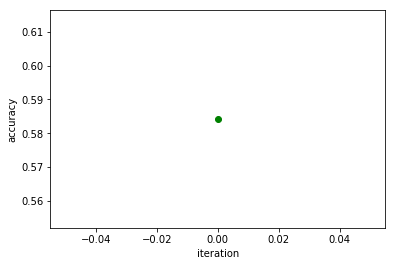

In [24]:
k_means2(10,centr10)

k=15, energy, accuracy(train)

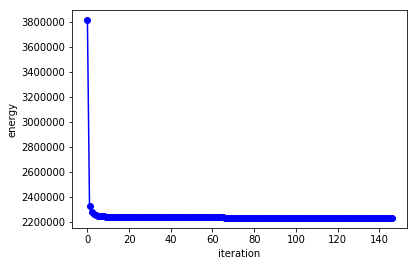

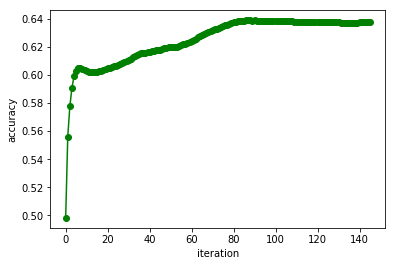

In [25]:
centr15 = np.zeros(((size_row*size_col),15),dtype='float')  #centroids
centr15 = k_means(15)

k=15, accuracy(test)

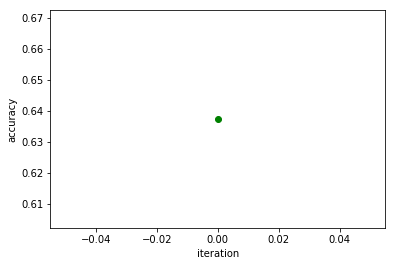

In [26]:
k_means2(15,centr15)

k=20, energy, accuracy(train)

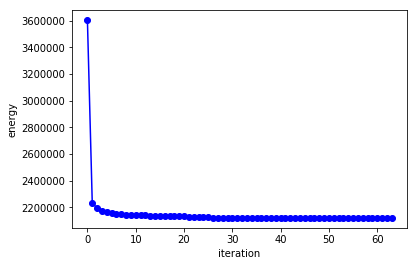

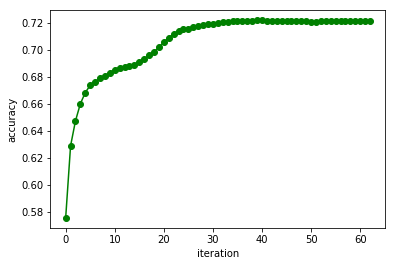

In [27]:
centr20 = np.zeros(((size_row*size_col),20),dtype='float')  #centroids
centr20 = k_means(20)

k=20, accuracy(test)

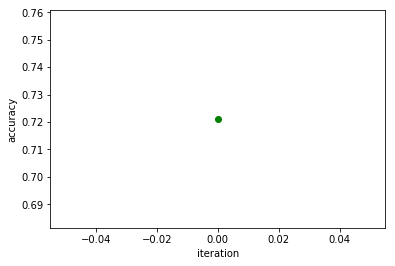

In [28]:
k_means2(20,centr20)